## Website Traffic -- Data Engineering & Analysis
### The Data
- Traffic to a website containing links to music (from Kaggle) for 1 week.
- Contains link, what type of event (click/preview/pageview), date, geographic data, data about the artist, album, etc.
### The Analysis
- Look at page views by day, click rate, click rate by link, the countries included (and how often) in who visits and interacts with the site, and a quick analysis of the correlations between the different numerical and categorical variables.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/kaggle/input/website-traffic-analysis/datasets/traffic.csv')
df.head()

,event,date,country,city,artist,album,track,isrc,linkid
0,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
1,click,2021-08-21,Saudi Arabia,Jeddah,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8
2,click,2021-08-21,India,Ludhiana,Reyanna Maria,So Pretty,So Pretty,USUM72100871,23199824-9cf5-4b98-942a-34965c3b0cc2
3,click,2021-08-21,France,Unknown,"Simone & Simaria, Sebastian Yatra",No Llores Más,No Llores Más,BRUM72003904,35573248-4e49-47c7-af80-08a960fa74cd
4,click,2021-08-21,Maldives,Malé,Tesher,Jalebi Baby,Jalebi Baby,QZNWQ2070741,2d896d31-97b6-4869-967b-1c5fb9cd4bb8


In [3]:
# How many total page views?
print(f'Number of Page View Events (All-Time): {len(df[df.event == "pageview"])}')

# How many per day?
num_days = len(df.date.unique())
print(f'Number of Page View Events (Per Day): {int(len(df[df.event == "pageview"])/num_days)}')

# Views each day
df[df.event=='pageview'].groupby(by='date')['event'].count()

Number of Page View Events (All-Time): 142015
Number of Page View Events (Per Day): 20287


date
2021-08-19    22366
2021-08-20    21382
2021-08-21    21349
2021-08-22    20430
2021-08-23    18646
2021-08-24    18693
2021-08-25    19149
Name: event, dtype: int64

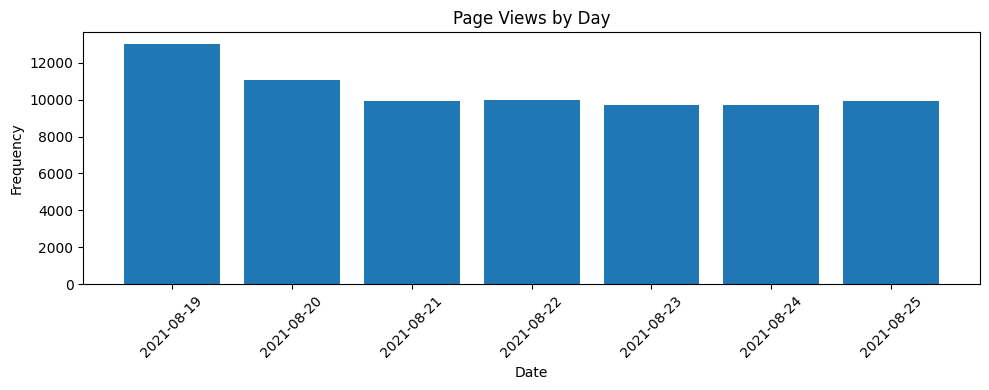

In [4]:
# Unique page views each day from different sources
daily_views = df[df.event == 'pageview'].drop_duplicates().groupby(by='date')['event'].count()
daily_views_df = daily_views.reset_index().rename(columns={'event': 'page_views'})

plt.figure(figsize=(10, 4))
plt.bar(daily_views_df['date'], daily_views_df['page_views'])
plt.title('Page Views by Day')
plt.xlabel('Date')
plt.ylabel('Frequency')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

In [5]:
# What types of events are there?
print(f'Types of Page View Events: {df.event.unique()}')

# How many page previews?
print(f'Total Previews: {len(df[df.event == "preview"])}, Previews/Day: {int(len(df[df.event == "preview"])/7)}')

# How many clicks?
print(f'Total Clicks: {len(df[df.event == "click"])}, Clicks/Day: {int(len(df[df.event == "click"])/7)}')

Types of Page View Events: ['click' 'preview' 'pageview']
Total Previews: 28531, Previews/Day: 4075
Total Clicks: 55732, Clicks/Day: 7961


In [6]:
# What countries did the pageviews come from?
print(f'Countries w/ Pageviews: {df[(df.event == "pageview")].country.unique()}')

Countries w/ Pageviews: ['Saudi Arabia' 'United States' 'Ireland' 'United Kingdom' 'France'
 'Guatemala' 'Jordan' 'Kuwait' 'Pakistan' 'Italy' 'Germany' 'Iraq' 'Peru'
 'India' 'Nicaragua' 'Rwanda' 'Tanzania' 'United Arab Emirates' 'Norway'
 'Oman' 'Bahamas' 'Algeria' 'Czechia' 'Mexico' 'Jamaica' 'Netherlands'
 'Colombia' 'Morocco' 'Australia' 'Myanmar' 'Uzbekistan' 'Austria'
 'Latvia' 'Turkey' 'Mauritania' 'Sri Lanka' 'Bosnia and Herzegovina'
 'Estonia' 'Nigeria' 'Bulgaria' 'Greece' 'El Salvador' 'Philippines'
 'Denmark' 'Serbia' 'Canada' 'Spain' 'Libya' 'Palestine' 'Chad' 'Ecuador'
 'Mali' 'Romania' 'Switzerland' 'Portugal' 'Slovenia' 'Iceland' 'Sweden'
 'Bahrain' 'Egypt' 'Lithuania' 'Liberia' 'Israel' 'Ukraine' 'Puerto Rico'
 'South Africa' 'Ghana' 'Kenya' 'Armenia' 'Nepal' 'Barbados' 'Azerbaijan'
 'Qatar' 'Uganda' 'Poland' 'Brazil' 'Guyana' 'Fiji' 'Bangladesh' 'Belgium'
 'Hong Kong' 'Haiti' 'Botswana' 'Ivory Coast' 'Bhutan' 'Indonesia'
 'Réunion' 'Cameroon' 'Singapore' 'Yemen' 'Frenc

In [7]:
# Get the number of views from each country
countries = df[(df.event == "pageview")].groupby(by='country')['event'].count()
countries_df = countries.reset_index().rename(columns={'event': 'pageviews'})
countries_df.head()

,country,pageviews
0,Afghanistan,2
1,Albania,344
2,Algeria,443
3,American Samoa,3
4,Andorra,2


In [8]:
pip install -q geopandas

Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_18/156184649.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


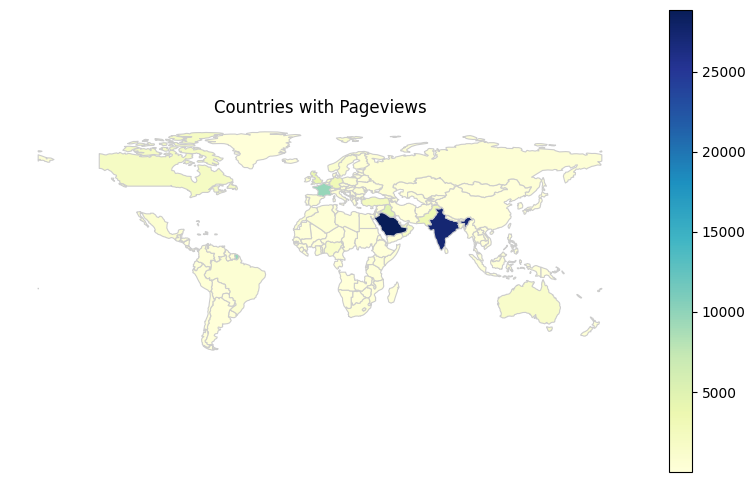

In [9]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load world shapefile
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# List of countries to highlight
#highlight_countries = df[(df.event == "pageview")].country.unique()
highlight_countries = countries_df.country
# Filter world dataframe to include only the countries in the highlight list
#highlighted_world = world[world['name'].isin(highlight_countries)]
world = world.merge(countries_df, how='left', left_on='name', right_on='country')
# Plot the world map
fig, ax = plt.subplots(figsize=(10, 6))
#world.plot(ax=ax, color='lightgrey')

# Highlight the selected countries
#highlighted_world.plot(ax=ax, color='green')
world.plot(column='pageviews', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Add title and show plot
plt.title('Countries with Pageviews')
plt.axis('off')  # Turn off axis
plt.show()

In [10]:
# Overall click rate: clicks/pageviews
print(f'Clickrate: {round(len(df[df.event == "click"])/len(df[df.event == "pageview"]),4)*100}%')

Clickrate: 39.24%


In [11]:
# How does the clickrate distribute across different links?
# First create DFs for page view/click counts for every link
click_df = df[df.event == 'click'].groupby(by='linkid')['event'].count().reset_index().rename(columns={'event': 'click_count'})
page_df = df[df.event == 'pageview'].groupby(by='linkid')['event'].count().reset_index().rename(columns={'event': 'pageview_count'})

# Merge the df's on the links
events_df = click_df.merge(page_df, on='linkid')

# Calculate the click rates in a new column for each link
events_df['clickrate'] = round((events_df.click_count / events_df.pageview_count)*100,2)

events_df.head()

,linkid,click_count,pageview_count,clickrate
0,00126b32-0c35-507b-981c-02c80d2aa8e7,2,2,100.00
1,004b9724-abca-5481-b6e9-6148a7ca00a5,1,1,100.00
2,0063a982-41cd-5629-96d0-e1c4dd72ea11,2,3,66.67
3,006af6a0-1f0d-4b0c-93bf-756af9071c06,8,36,22.22
4,00759b81-3f04-4a61-b934-f8fb3185f4a0,3,4,75.00


In [12]:
events_df.clickrate

0       100.00
1       100.00
2        66.67
3        22.22
4        75.00
         ...  
2248     34.52
2249    100.00
2250    100.00
2251     50.00
2252     50.00
Name: clickrate, Length: 2253, dtype: float64

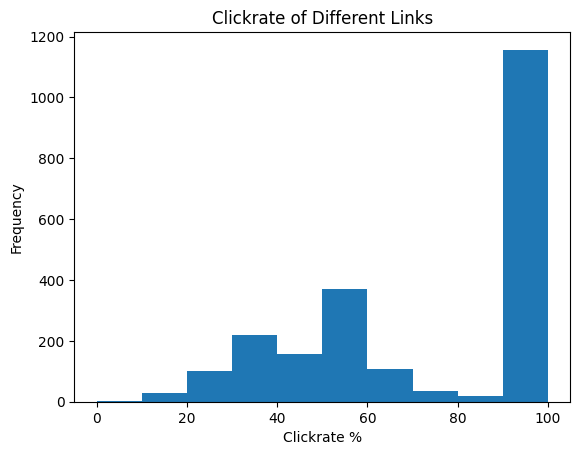

In [13]:
# Plot the click rate for different links. Use 10 bins for %s
import matplotlib.pyplot as plt
plt.hist(events_df['clickrate'], bins=range(0, 101, 10))
plt.title('Clickrate of Different Links')
plt.xlabel('Clickrate %')
plt.ylabel('Frequency')
plt.show()

Is there any correlation between clicks and previews on a link? Is it significant? How large is the effect? Make sure to at least test for potential linear as well as categorical (think binary) relationships between both variables.

In [14]:
# Take original df and count the events that are preview or click
clicks = df[df['event'] == 'click'].groupby(by='linkid')['event'].count()
clicks_df = clicks.reset_index().rename(columns={'event': 'clicks'})

previews = df[df['event'] == 'preview'].groupby(by='linkid')['event'].count()
previews_df = previews.reset_index().rename(columns={'event': 'previews'})

counts_df = clicks_df.merge(previews_df, on='linkid', how='inner')

# Keep only rows that have counts of both
counts_df.dropna(subset=['clicks', 'previews'], inplace=True)
counts_df.sort_values(by='clicks', ascending=False)

,linkid,clicks,previews
81,2d896d31-97b6-4869-967b-1c5fb9cd4bb8,9692,5974
418,e849515b-929d-44c8-a505-e7622f1827e9,2198,1571
141,522da5cc-8177-4140-97a7-a84fdb4caf1c,2109,1605
187,681d888a-59ce-4acb-b7c5-95dab0c063d9,1500,658
350,c2c876ab-b093-4750-9449-6b4913da6af3,1429,1001
...,...,...,...
249,85de285e-8c72-4fc1-a1c7-ce2f34121ca1,1,1
74,297fa1f6-7505-49b3-8210-a9ee2ba92091,1,2
416,e7d83d9f-7119-48d4-b570-e6af90976e34,1,1
69,27c6ad2e-f5b0-4584-a803-33111b48d48d,1,1


In [15]:
# Look at correlations between clicks and previews
print(f'Pearson Correlation Coefficient r = {counts_df.clicks.corr(counts_df.previews)}')

Pearson Correlation Coefficient r = 0.9934224704248962


**Note:** An r value close to 1 makes sense since you likely have to preview the link to click on it. Not exactly being 1 could indicate hovering over it but not clicking? Perhaps multiple times before clicking.

Now we can look at the categorical variables and see if there's any correlations between their occurances. First, we can use factorize which returns a tuple of the codes and then the corresponding categories for each code.

In [16]:
# Merge the counts df with the original one on the links to get other variables
big_df = df.merge(counts_df, on='linkid', how='left')

# Get categorical variables and convert into category codes
cat_df = big_df[[ 'country', 'city', 'artist', 'album', 'track']]

# Each row should get factorized. Factorize returns  and then the corresponding category
encoded_cat_df = cat_df.apply(lambda x: pd.factorize(x)[0])

In [17]:
# Get the correlations of each category with each other with colors to help id large r
encoded_cat_df.corr().style.background_gradient(cmap='coolwarm')

,country,city,artist,album,track
country,1.000000,0.188101,0.010852,0.006472,0.005394
city,0.188101,1.000000,0.088732,0.095431,0.097308
artist,0.010852,0.088732,1.000000,0.901881,0.875746
album,0.006472,0.095431,0.901881,1.000000,0.963166
track,0.005394,0.097308,0.875746,0.963166,1.000000


It looks like there's high correlations between album and artist, artist and track, album and track, all of which make a lot of sense since they're dependent upon each other. How about chi square analysis? We have a LOT of categories, many of which will be identically 0 most of the time, which won't work well with chi square.